In [26]:
!nvidia-smi

Thu Mar 27 14:07:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             11W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [27]:
!pip install ultralytics


In [28]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.2/8062.4 GB disk)


In [29]:
from ultralytics import YOLO
from IPython.display import Image

In [30]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fyB7Pm9ab8YEOFhWO7B5")
project = rf.workspace("jayz-workspace").project("helmet-detector-9rzmg")
version = project.version(4)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...


In [31]:
import os
print(os.path.exists('/kaggle/working/Helmet-Detector-4'))


True


In [32]:
import os

yaml_path = "/kaggle/working/Helmet-Detector-4/data.yaml"
print(os.path.exists(yaml_path))  # Should return `True`

True


In [33]:
import yaml

# Define the path to your YAML file
yaml_path = "/kaggle/working/Helmet-Detector-4/data.yaml"

# Read the YAML file
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Print the current content
print("Current YAML content:")
print(data)

Current YAML content:
{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 13, 'names': ['Cycling Helmet', 'half face', 'hard hat', 'helmet', 'modular helmet', 'motorbike', 'motorcyclist', 'no helmet', 'nutshell', 'person', 'plate', 'quarter face helmet', 'sports helmet'], 'roboflow': {'workspace': 'jayz-workspace', 'project': 'helmet-detector-9rzmg', 'version': 4, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/jayz-workspace/helmet-detector-9rzmg/dataset/4'}}


In [34]:
import ipywidgets as widgets
from IPython.display import display
import os

def open_and_edit_file(file_path):
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return
    
    # Read the file content
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Create widgets
    text_area = widgets.Textarea(value=content, layout={'width': '100%', 'height': '300px'})
    save_button = widgets.Button(description="Save Changes")
    output = widgets.Output()
    
    # Save function
    def on_save_button_clicked(b):
        with output:
            try:
                with open(file_path, 'w') as f:
                    f.write(text_area.value)
                print("✅ File saved successfully!")
            except Exception as e:
                print(f"❌ Error saving file: {str(e)}")
    
    save_button.on_click(on_save_button_clicked)
    
    # Display widgets
    print(f"Editing: {file_path}")
    display(text_area)
    display(save_button)
    display(output)

# Usage - replace with your actual path
file_to_edit = "/kaggle/working/Helmet-Detector-4/data.yaml"
open_and_edit_file(file_to_edit)

Editing: /kaggle/working/Helmet-Detector-4/data.yaml


Textarea(value="train: ../train/images\nval: ../valid/images\ntest: ../test/images\n\nnc: 13\nnames: ['Cycling…

Button(description='Save Changes', style=ButtonStyle())

Output()

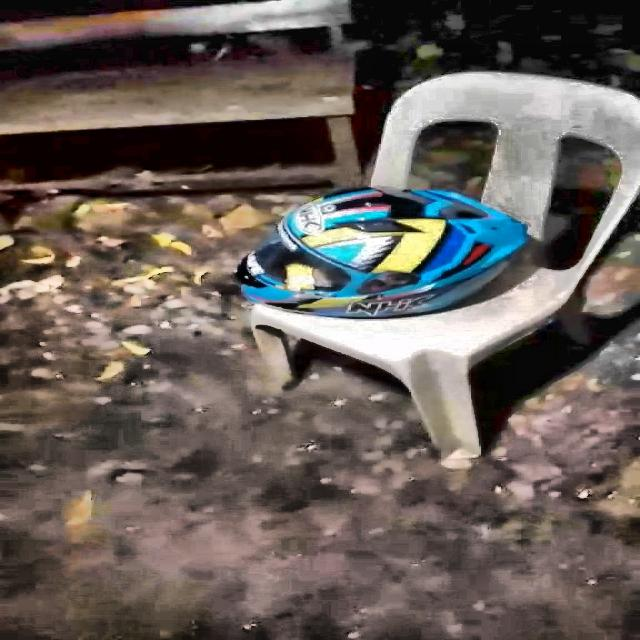

🖼️ Displaying: 416536556_7209359705787581_7005850060369918163_n_mp4-7_jpg.rf.d5aada4e4d9a4956f332cdacab1c0960.jpg


In [35]:
from IPython.display import Image, display
import os

def open_image(image_path):
    """Open and display an image file from the given path."""
    
    # Check if file exists
    if not os.path.exists(image_path):
        print(f"🚨 Error: Image not found at {image_path}")
        return
    
    # Check if it's an image file
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    file_ext = os.path.splitext(image_path)[1].lower()
    
    if file_ext not in image_extensions:
        print(f"⚠️ Not a supported image format. Supported: {', '.join(image_extensions)}")
        return
    
    # Display the image
    try:
        display(Image(filename=image_path))
        print(f"🖼️ Displaying: {os.path.basename(image_path)}")
    except Exception as e:
        print(f"❌ Error displaying image: {str(e)}")

# Example usage:
image_path = "/kaggle/working/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-7_jpg.rf.d5aada4e4d9a4956f332cdacab1c0960.jpg"  # Replace with your path
open_image(image_path)

In [46]:
!yolo task=detect mode=train data=/kaggle/working/Helmet-Detector-4/data.yaml model="yolo11n.pt" epochs=7 imgsz=640


Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/Helmet-Detector-4/data.yaml, epochs=7, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

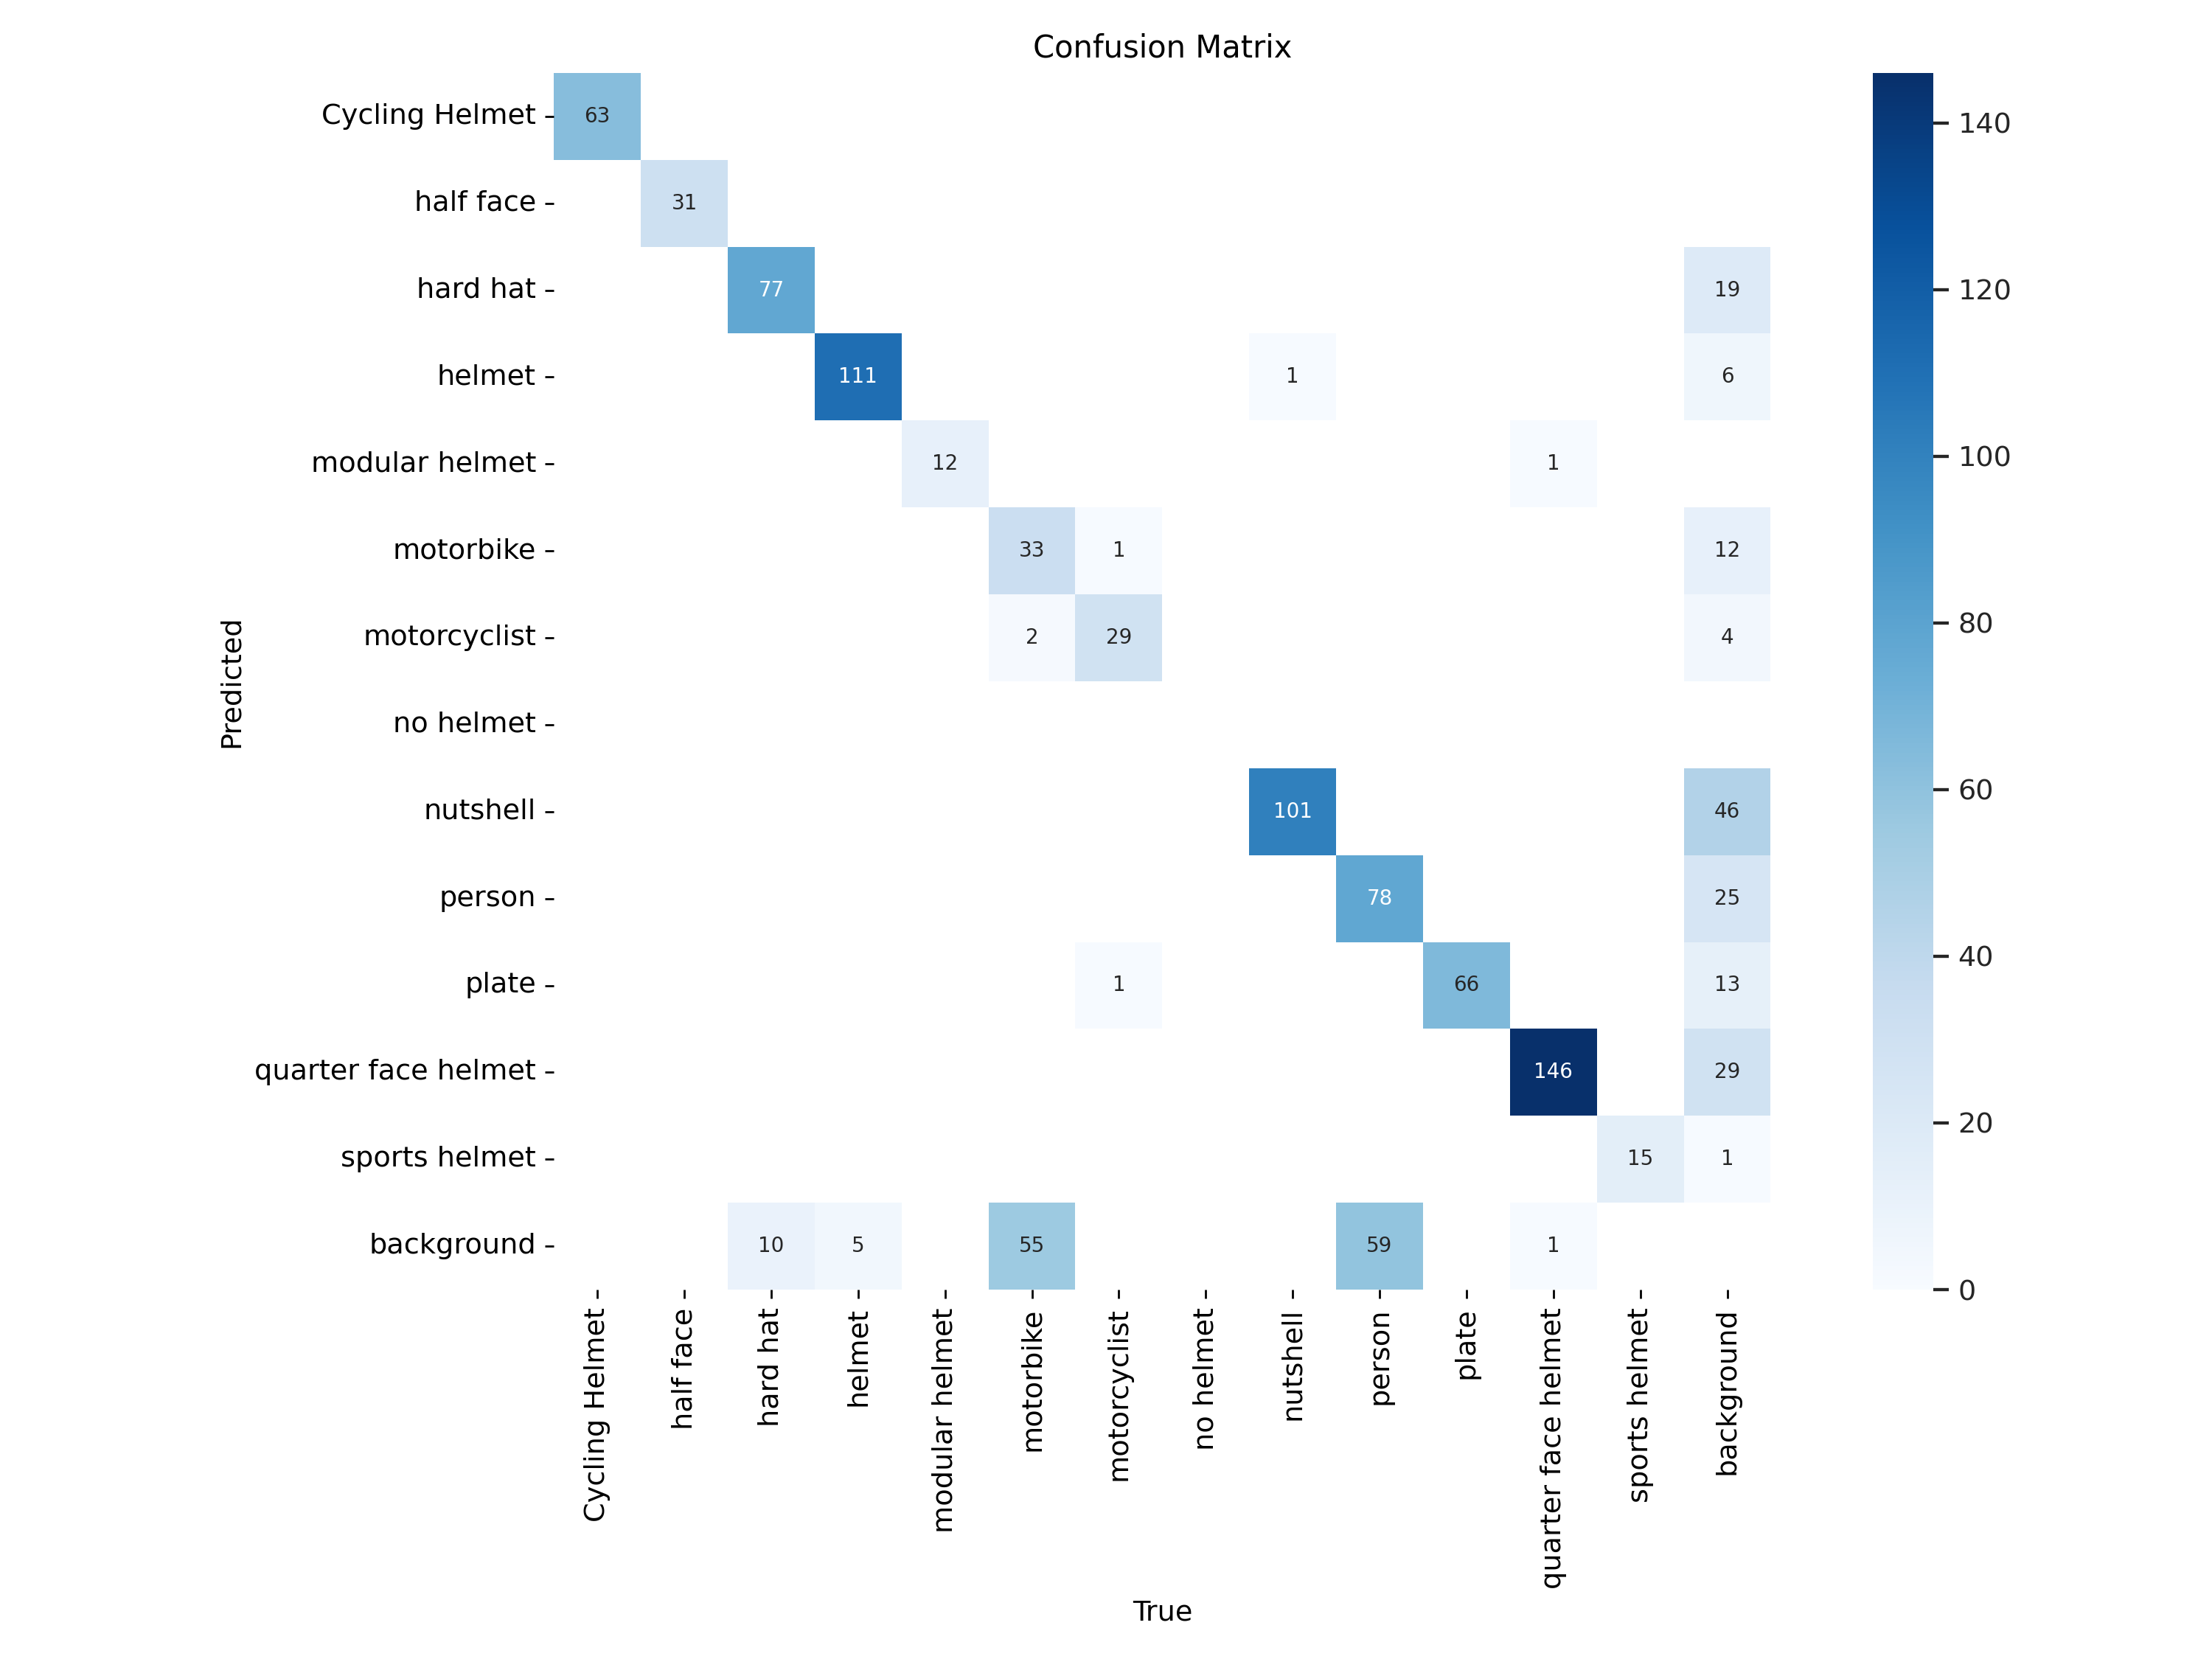

In [50]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png", width=600)

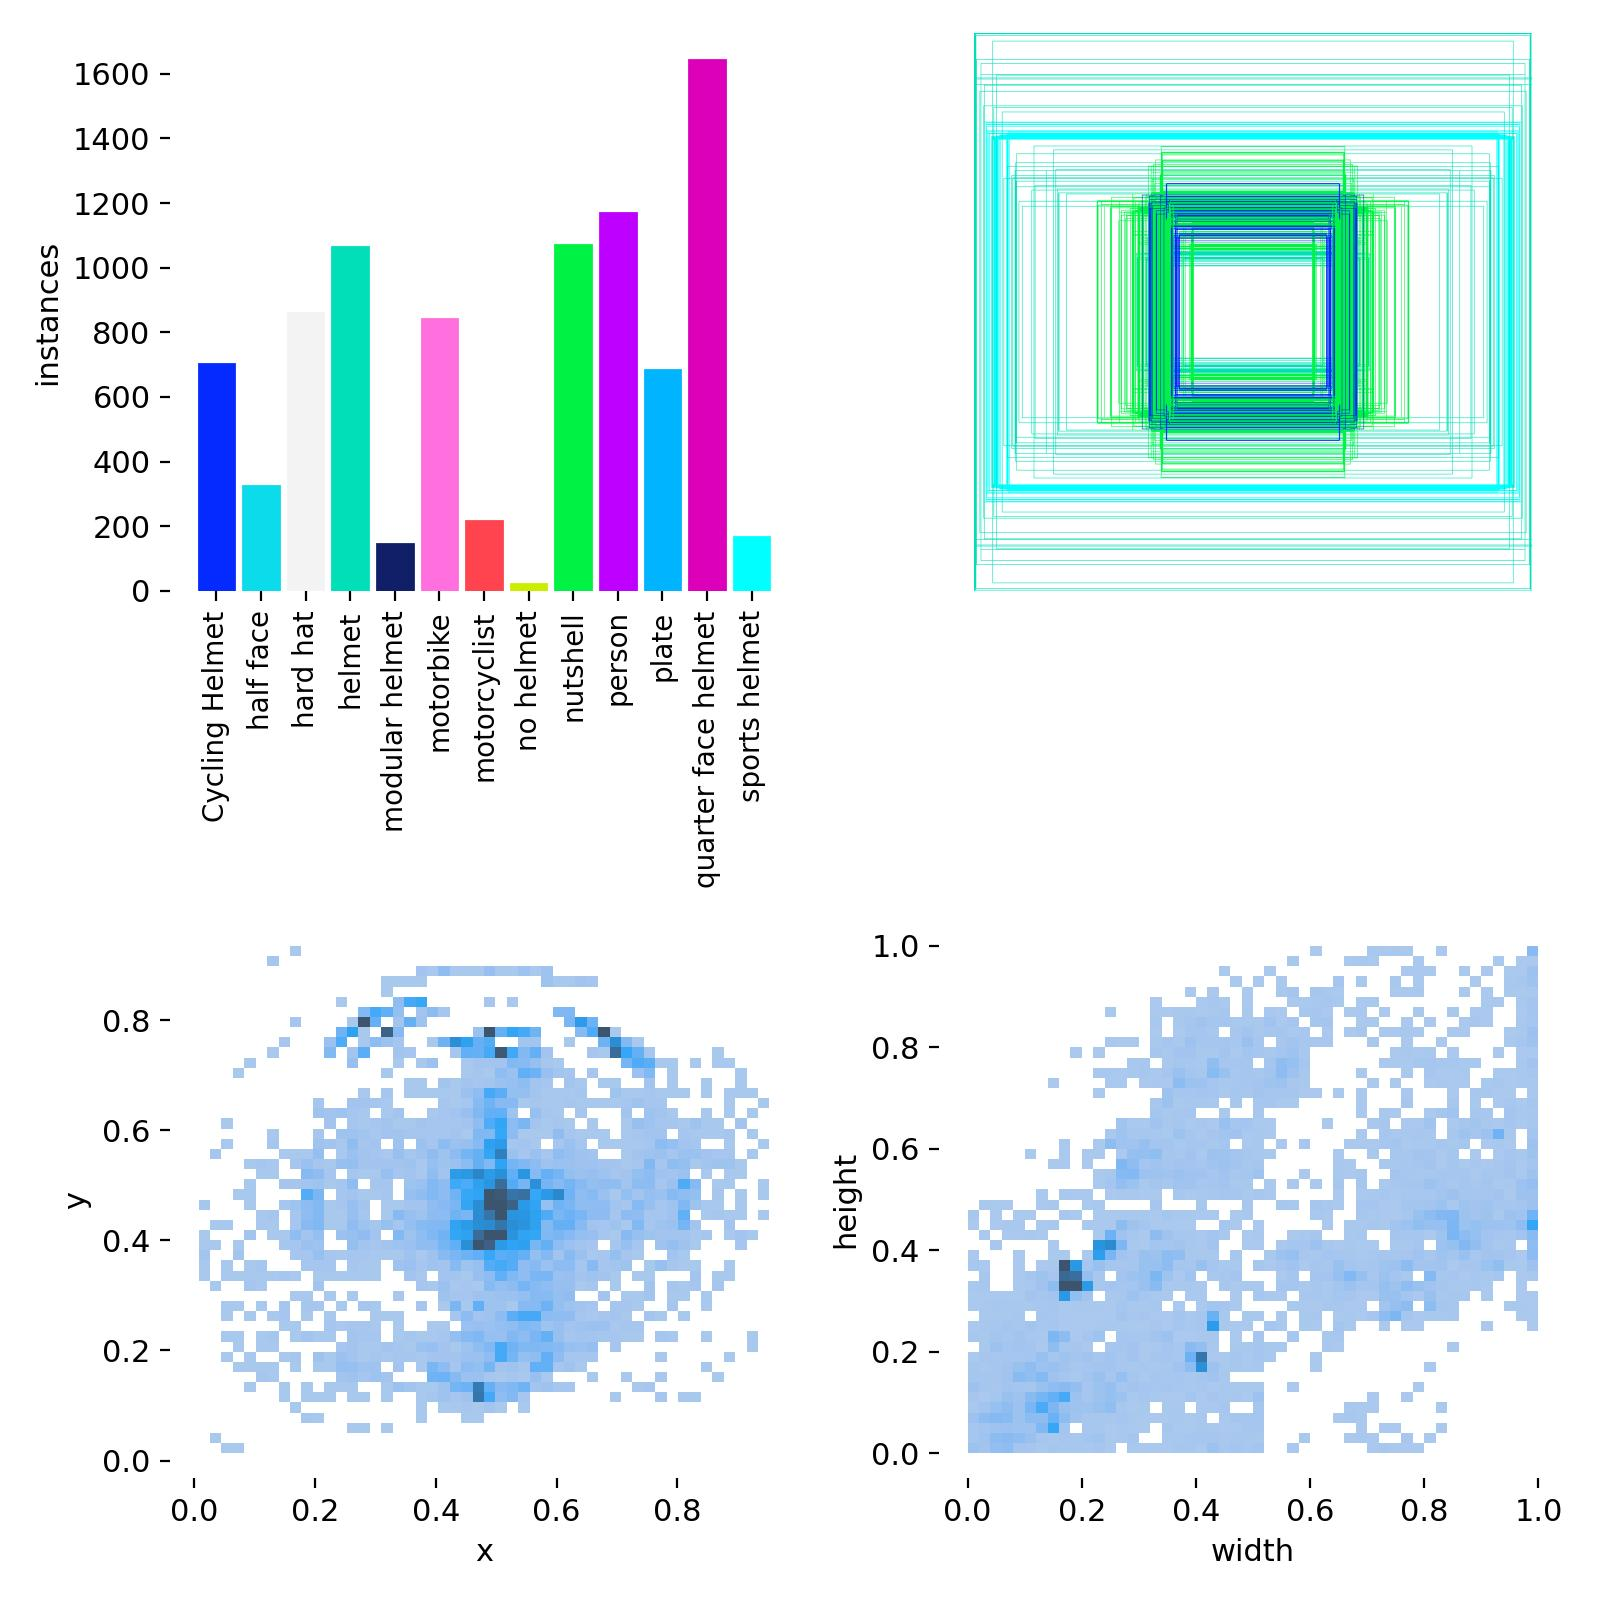

In [51]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

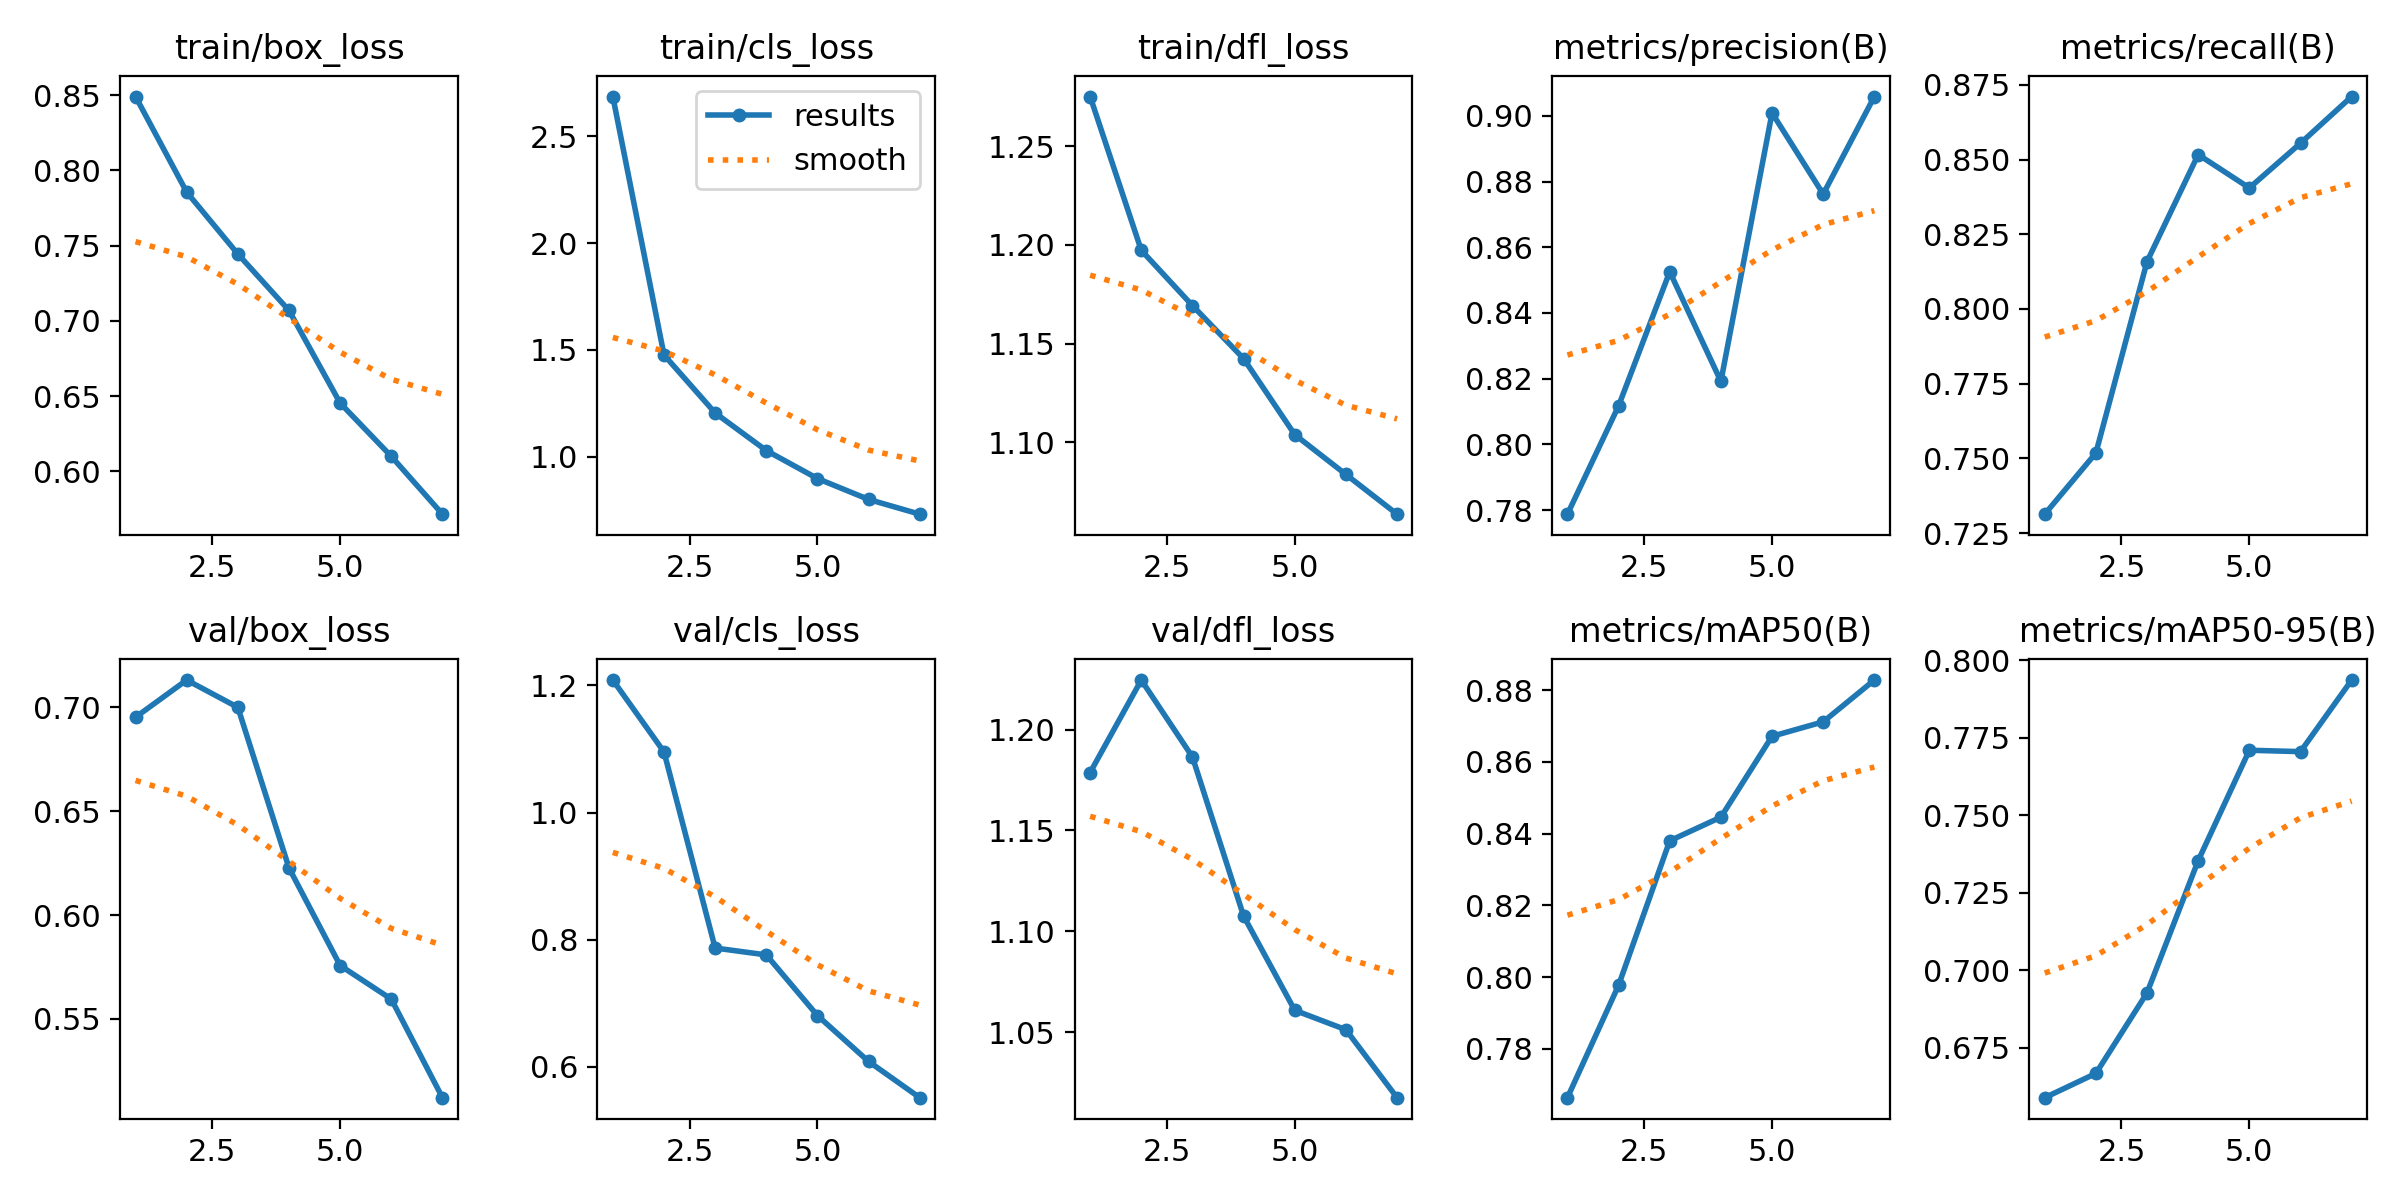

In [52]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

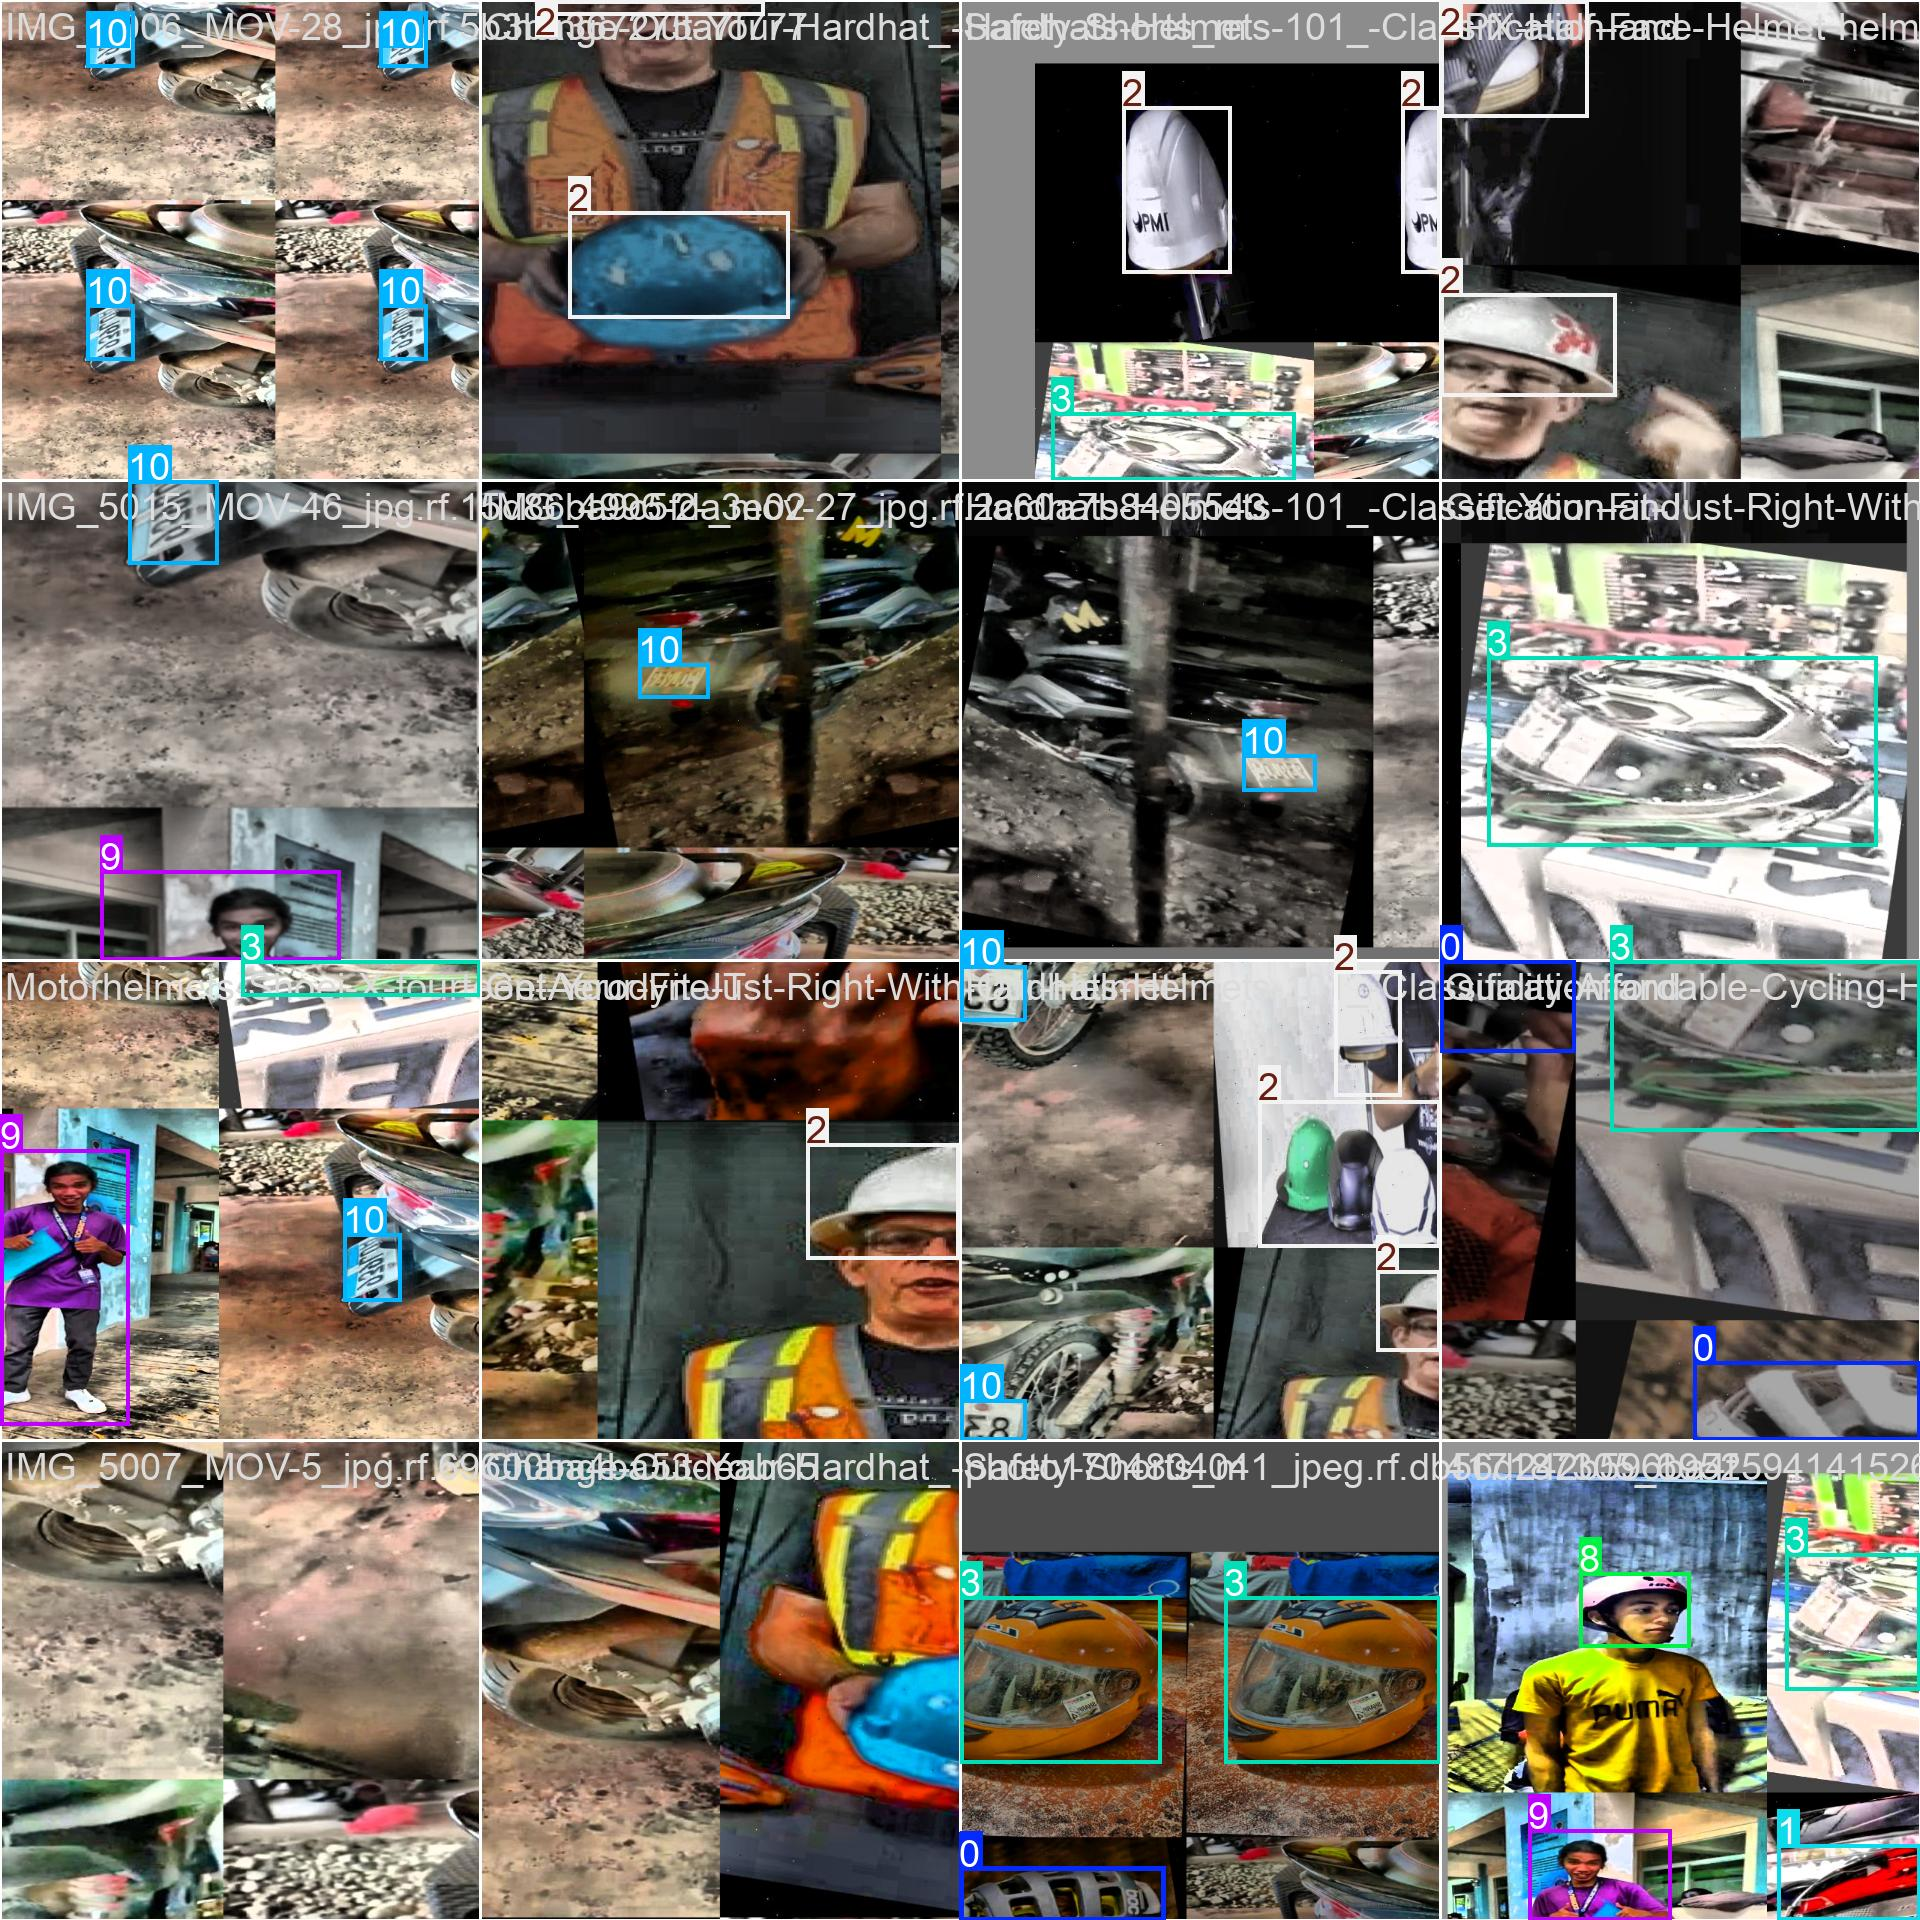

In [54]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg", width=600)

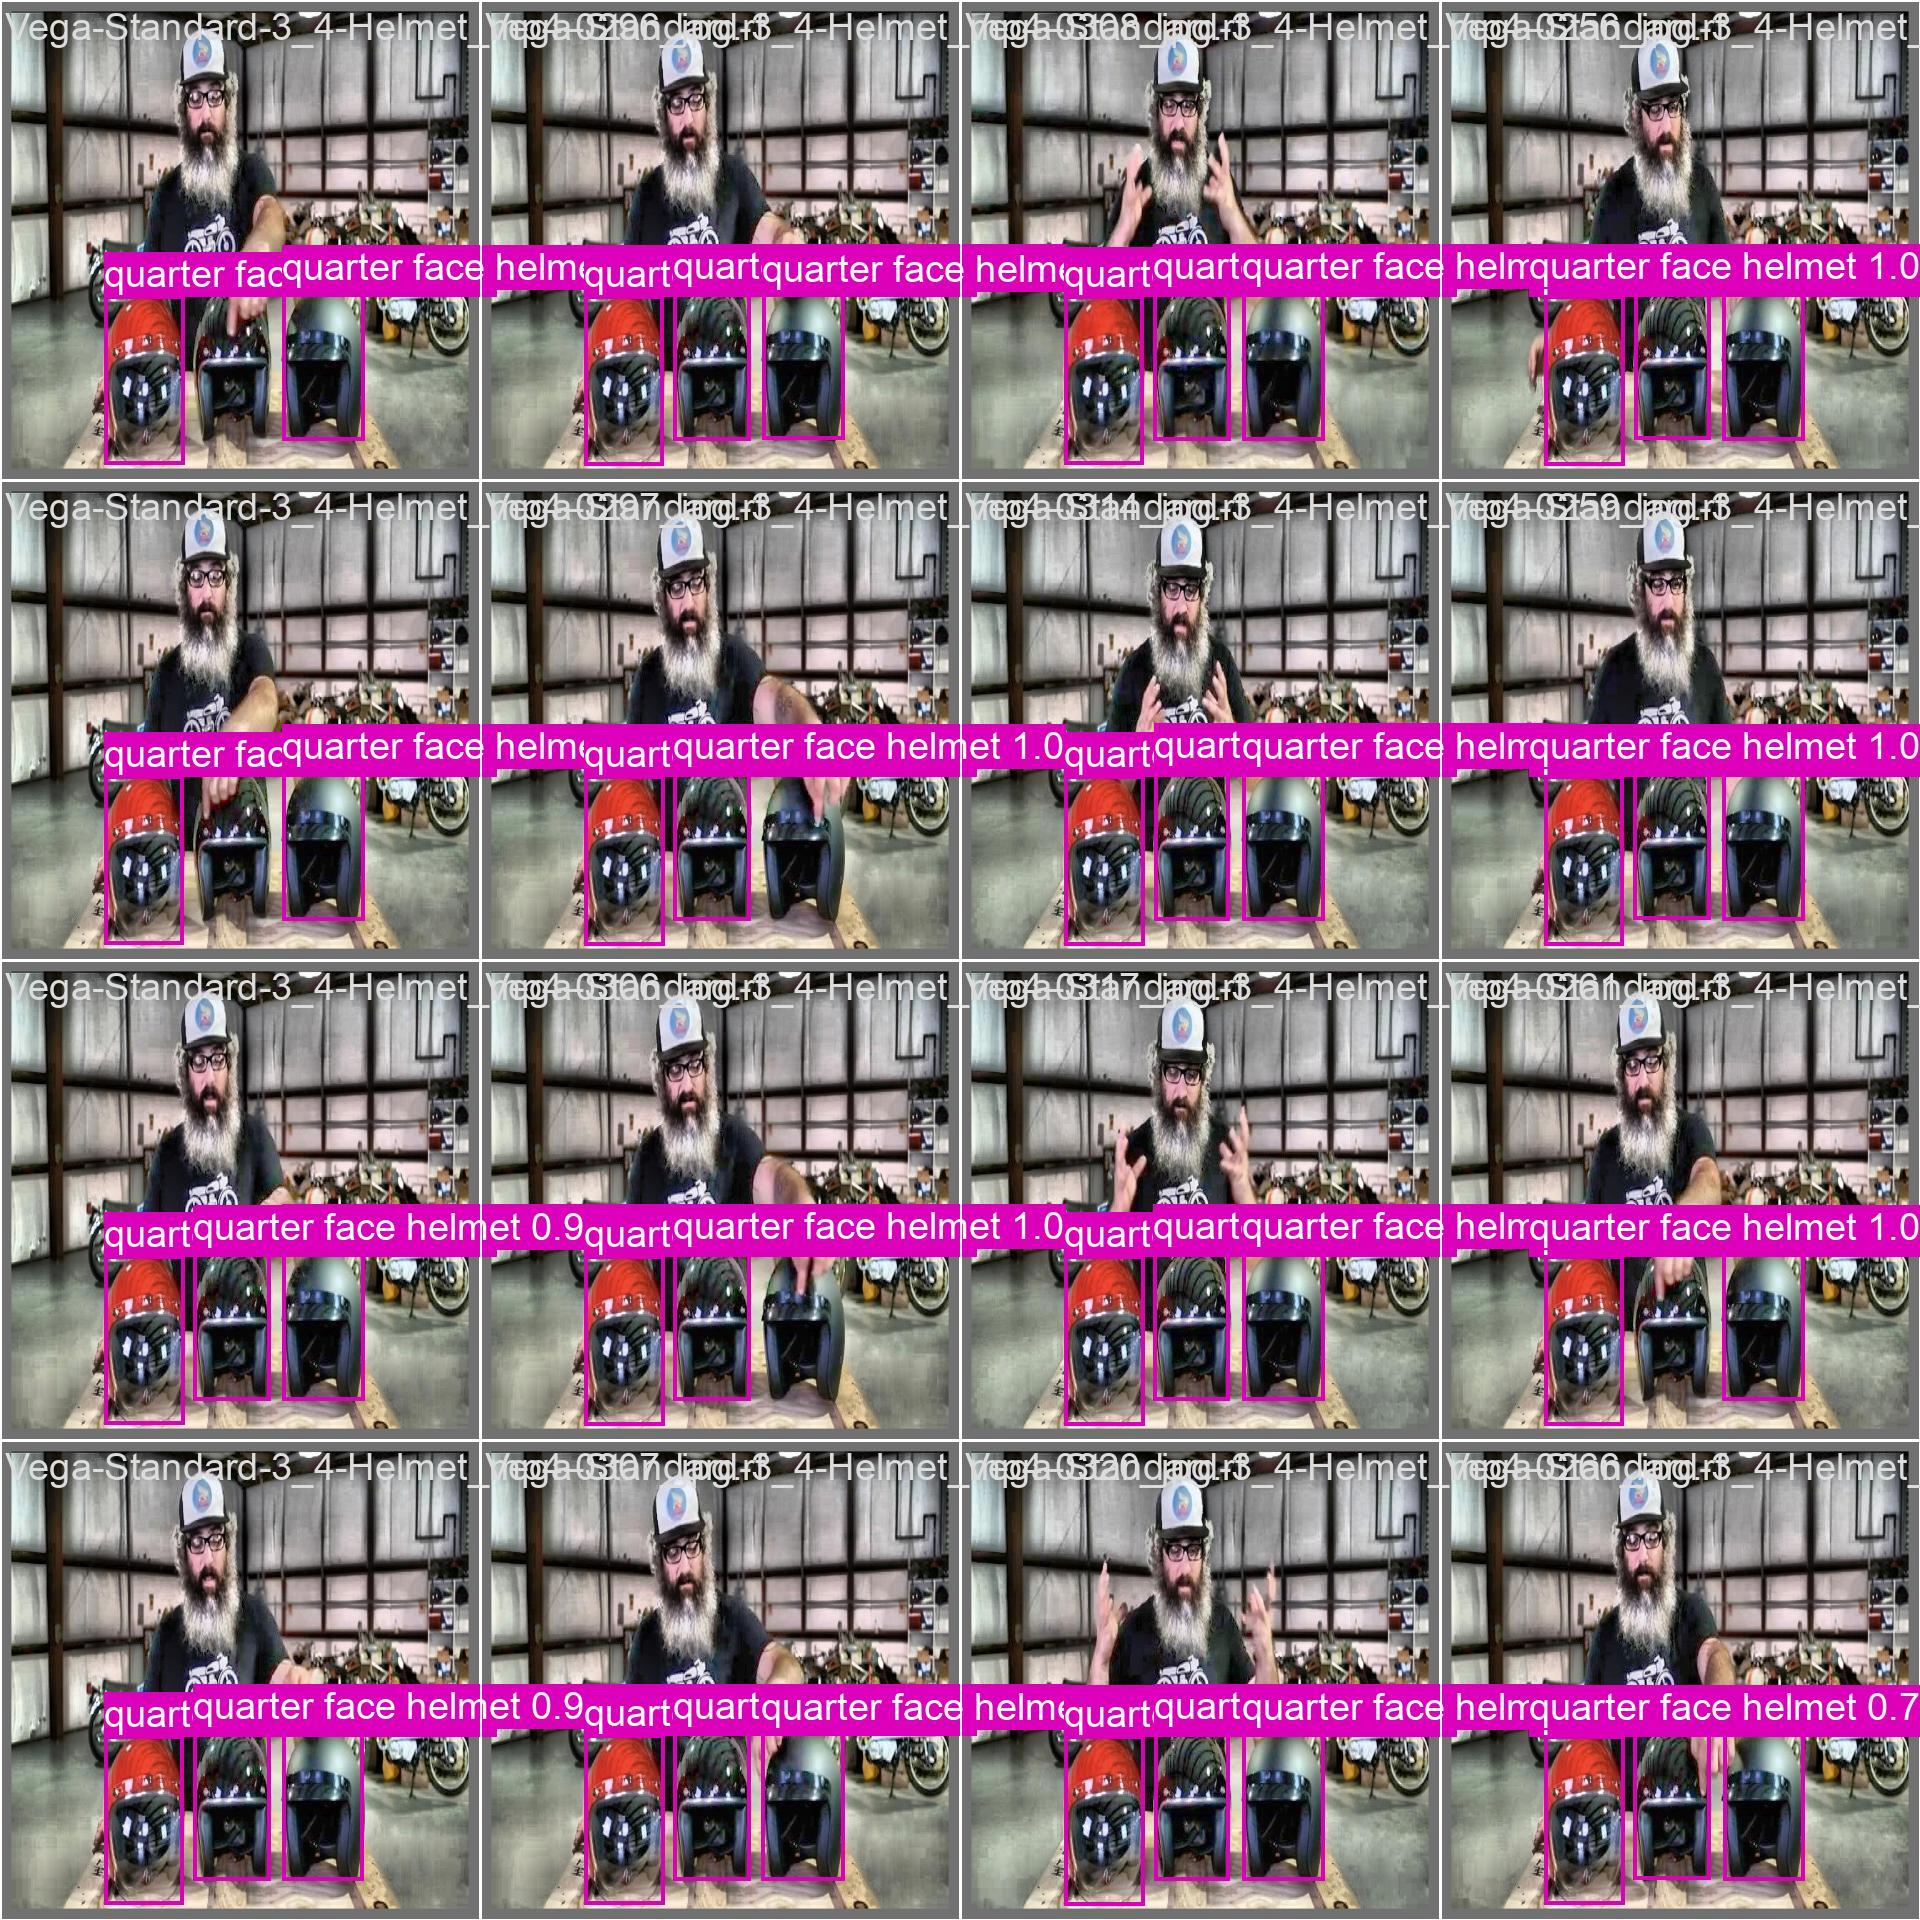

In [41]:
Image("/kaggle/working/runs/detect/train/val_batch0_pred.jpg", width=600)

In [55]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/388 /kaggle/working/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.bf848a898612e8ad8c8e9e109fc1f908.jpg: 640x640 1 sports helmet, 10.2ms
image 2/388 /kaggle/working/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.6fc9af6125bdea4486325dc4fff8c315.jpg: 640x640 1 sports helmet, 8.9ms
image 3/388 /kaggle/working/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.3a8d4caf2715fac8d79efbe05d28f322.jpg: 640x640 1 sports helmet, 9.0ms
image 4/388 /kaggle/working/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-29_jpg.rf.c4121174733d24d59565fc7b89c683b0.jpg: 640x640 1 helmet, 8.3ms
image 5/388 /kaggle/working/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-3_jpg

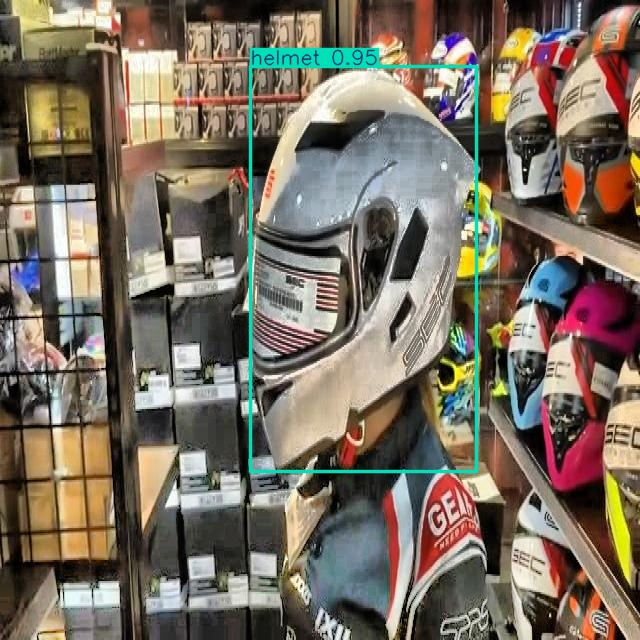

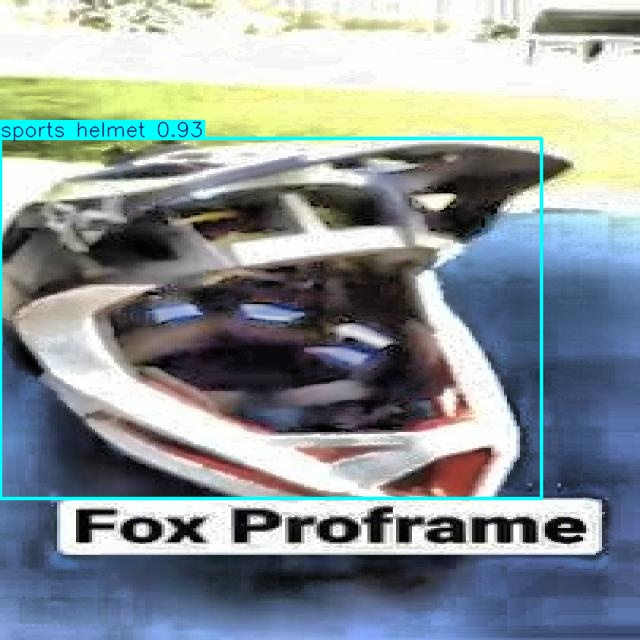

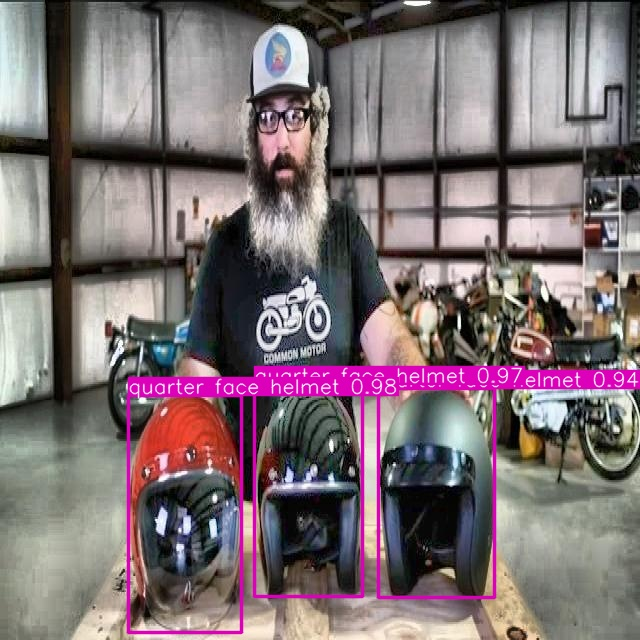

In [56]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [44]:
import shutil

# Copy from input to working directory (if already uploaded)
shutil.copy("/kaggle/input/gonnatest/pred_helmet.jpg", "/kaggle/working/pred_helmet.jpg")

# OR save a newly generated image (e.g., from matplotlib)
import matplotlib.pyplot as plt
plt.savefig("/kaggle/working/pred_helmet.jpg")  # Example

<Figure size 640x480 with 0 Axes>

In [59]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=pred_helmet.jpg save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 958, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 1039, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 944, in torch_safe_load
    ckpt = torch.load(f